# Breast Cancer Prediction Using Machine Learning
This notebook explores various machine learning models to classify breast cancer as **benign or malignant**:
- Load and preprocess the data
- Train multiple models
- Compare their performance using various evaluation metrics


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data=pd.read_csv(r"C:\Users\user\Documents\data scii\data sciense\breast_cancer.csv")

In [72]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [73]:
data.shape

(569, 33)

In [74]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [75]:
data.drop("id",axis=1,inplace=True)

In [76]:
data.drop("Unnamed: 32",axis=1,inplace=True)

This dataset contains 569 instances of breast cancer cases, with 32 clinical and diagnostic features derived from fine needle aspirate (FNA) biopsies of breast tissue. The goal is to classify tumors as Malignant (M) or Benign (B) based on their characteristics.

Dataset Composition

Total Instances: 569

Total Features: 32 (excluding the redundant ID column)

Target Variable: diagnosis

M (Malignant - Cancerous): 212 cases

B (Benign - Non-cancerous): 357 cases

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Scale numerical features for better model performance


In [80]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [81]:
data["diagnosis"]=data["diagnosis"].map({"M":1,"B":0})

In [82]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [84]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_14300\2817714511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['diagnosis'], palette='coolwarm')


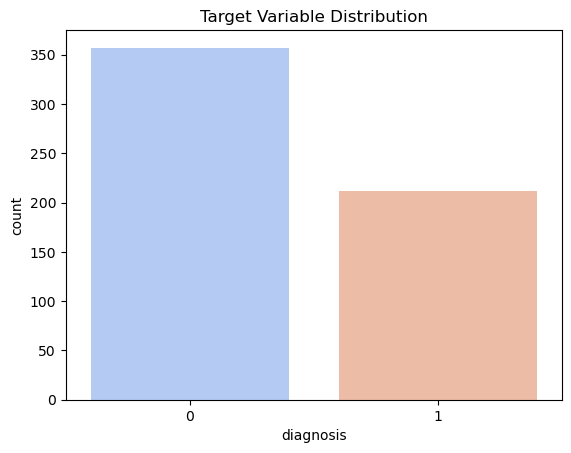

In [85]:

sns.countplot(x=data['diagnosis'], palette='coolwarm')
plt.title("Target Variable Distribution")
plt.show()



In [86]:
from sklearn.preprocessing import MinMaxScaler 

In [87]:
scaler=MinMaxScaler()

In [88]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


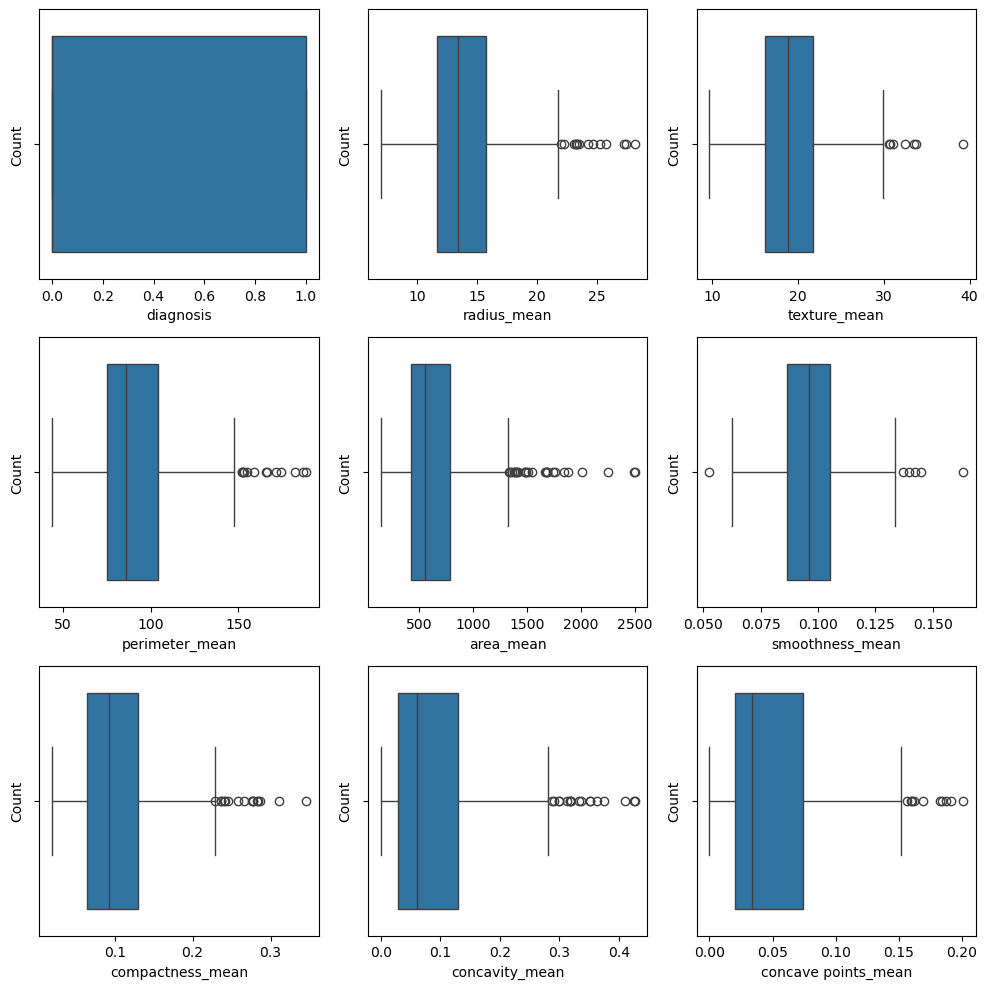

In [89]:
plt.figure(figsize=(10,10))
plotno=1
for column in data:
    if plotno <=9:
        ax=plt.subplot(3,3,plotno)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("Count")
    plotno+=1
plt.tight_layout()

In [90]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)

In [91]:
iqr=q3-q1
iqr

diagnosis                    1.000000
radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_

In [92]:
lowerlimit=q1-1.5*iqr
upperlimit=q3+1.5*iqr

In [93]:
lowerlimit

diagnosis                   -1.500000
radius_mean                  5.580000
texture_mean                 7.725000
perimeter_mean              31.775000
area_mean                 -123.300000
smoothness_mean              0.057975
compactness_mean            -0.033300
concavity_mean              -0.122150
concave points_mean         -0.060225
symmetry_mean                0.111200
fractal_dimension_mean       0.045070
radius_se                   -0.137350
texture_se                  -0.126250
perimeter_se                -1.020500
area_se                    -23.160000
smoothness_se                0.000703
compactness_se              -0.015975
concavity_se                -0.025350
concave points_se           -0.002970
symmetry_se                  0.002680
fractal_dimension_se        -0.001217
radius_worst                 4.340000
texture_worst                8.120000
perimeter_worst             22.175000
area_worst                -337.750000
smoothness_worst             0.072500
compactness_

In [94]:
upperlimit

diagnosis                     2.500000
radius_mean                  21.900000
texture_mean                 30.245000
perimeter_mean              147.495000
area_mean                  1326.300000
smoothness_mean               0.133695
compactness_mean              0.228620
concavity_mean                0.282410
concave points_mean           0.154535
symmetry_mean                 0.246400
fractal_dimension_mean        0.078750
radius_se                     0.848650
texture_se                    2.434150
perimeter_se                  5.983500
area_se                      86.200000
smoothness_se                 0.012612
compactness_se                0.061505
concavity_se                  0.082490
concave points_se             0.025318
symmetry_se                   0.035960
fractal_dimension_se          0.008023
radius_worst                 27.460000
texture_worst                42.680000
perimeter_worst             187.335000
area_worst                 1937.050000
smoothness_worst         

In [95]:
lowerlimit/len(data)*100

diagnosis                  -0.263620
radius_mean                 0.980668
texture_mean                1.357645
perimeter_mean              5.584359
area_mean                 -21.669596
smoothness_mean             0.010189
compactness_mean           -0.005852
concavity_mean             -0.021467
concave points_mean        -0.010584
symmetry_mean               0.019543
fractal_dimension_mean      0.007921
radius_se                  -0.024139
texture_se                 -0.022188
perimeter_se               -0.179350
area_se                    -4.070299
smoothness_se               0.000124
compactness_se             -0.002808
concavity_se               -0.004455
concave points_se          -0.000522
symmetry_se                 0.000471
fractal_dimension_se       -0.000214
radius_worst                0.762742
texture_worst               1.427065
perimeter_worst             3.897188
area_worst                -59.358524
smoothness_worst            0.012742
compactness_worst          -0.024719
c

In [96]:
upperlimit/len(data)*100

diagnosis                    0.439367
radius_mean                  3.848858
texture_mean                 5.315466
perimeter_mean              25.921793
area_mean                  233.093146
smoothness_mean              0.023496
compactness_mean             0.040179
concavity_mean               0.049633
concave points_mean          0.027159
symmetry_mean                0.043304
fractal_dimension_mean       0.013840
radius_se                    0.149148
texture_se                   0.427794
perimeter_se                 1.051582
area_se                     15.149385
smoothness_se                0.002216
compactness_se               0.010809
concavity_se                 0.014497
concave points_se            0.004450
symmetry_se                  0.006320
fractal_dimension_se         0.001410
radius_worst                 4.826011
texture_worst                7.500879
perimeter_worst             32.923550
area_worst                 340.430580
smoothness_worst             0.033409
compactness_

In [97]:
percentage= (data<lowerlimit).sum()/len(data)*100 + (data>upperlimit).sum()/len(data)*100
percentage

diagnosis                   0.000000
radius_mean                 2.460457
texture_mean                1.230228
perimeter_mean              2.284710
area_mean                   4.393673
smoothness_mean             1.054482
compactness_mean            2.811951
concavity_mean              3.163445
concave points_mean         1.757469
symmetry_mean               2.636204
fractal_dimension_mean      2.636204
radius_se                   6.678383
texture_se                  3.514938
perimeter_se                6.678383
area_se                    11.423550
smoothness_se               5.272408
compactness_se              4.920914
concavity_se                3.866432
concave points_se           3.339192
symmetry_se                 4.745167
fractal_dimension_se        4.920914
radius_worst                2.987698
texture_worst               0.878735
perimeter_worst             2.636204
area_worst                  6.151142
smoothness_worst            1.230228
compactness_worst           2.811951
c

In [98]:
percentage[percentage<5]

diagnosis                  0.000000
radius_mean                2.460457
texture_mean               1.230228
perimeter_mean             2.284710
area_mean                  4.393673
smoothness_mean            1.054482
compactness_mean           2.811951
concavity_mean             3.163445
concave points_mean        1.757469
symmetry_mean              2.636204
fractal_dimension_mean     2.636204
texture_se                 3.514938
compactness_se             4.920914
concavity_se               3.866432
concave points_se          3.339192
symmetry_se                4.745167
fractal_dimension_se       4.920914
radius_worst               2.987698
texture_worst              0.878735
perimeter_worst            2.636204
smoothness_worst           1.230228
compactness_worst          2.811951
concavity_worst            2.108963
concave points_worst       0.000000
symmetry_worst             4.042179
fractal_dimension_worst    4.217926
dtype: float64

In [99]:
col = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [100]:
for i in col:
    data.loc[data[i]<lowerlimit[i],i]=data[i].median()


In [101]:
 data.loc[data[i]<lowerlimit[i]]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [102]:
for i in col:
    data.loc[data[i]>upperlimit[i],i]=data[i].median()


In [103]:
data.loc[data[i]>upperlimit[i]]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [104]:
dia=["diagnosis"]
scaled_data=data.drop(dia,axis=1)

In [105]:
data1=scaler.fit_transform(scaled_data)

In [106]:
data1

array([[0.74541269, 0.03307009, 0.76330789, ..., 0.91202749, 0.48551564,
        0.94804038],
       [0.92010292, 0.39782823, 0.86088301, ..., 0.63917526, 0.45770568,
        0.50445368],
       [0.86051865, 0.56959526, 0.83286639, ..., 0.83505155, 0.79103901,
        0.48307601],
       ...,
       [0.65129663, 0.90671273, 0.62322481, ..., 0.48728522, 0.25222093,
        0.34382423],
       [0.9221342 , 0.96841066, 0.9304415 , ..., 0.91065292, 0.97412128,
        0.37114014],
       [0.05274562, 0.73198421, 0.03989953, ..., 0.        , 0.50444187,
        0.22788005]])

In [107]:
data2 = pd.DataFrame(data1,columns=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [108]:
dia1=data[["diagnosis"]]

In [109]:
newdata=pd.concat([data2,dia1],axis=1)

In [110]:
newdata

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.745413,0.033070,0.763308,0.725159,0.787294,0.350445,0.219004,0.967763,0.969040,1.000000,...,0.178009,0.983870,0.286818,0.756189,0.309017,0.921315,0.912027,0.485516,0.948040,1
1,0.920103,0.397828,0.860883,1.000000,0.313143,0.283514,0.309253,0.461645,0.499226,0.233391,...,0.381830,0.794706,0.286818,0.397478,0.266668,0.312670,0.639175,0.457706,0.504454,1
2,0.860519,0.569595,0.832866,0.895983,0.663333,0.672280,0.702491,0.841447,0.698142,0.348870,...,0.452900,0.748515,0.871839,0.589911,0.664887,0.582891,0.835052,0.791039,0.483076,1
3,0.300562,0.526654,0.326442,0.205159,0.469925,0.350445,0.859075,0.692105,0.483746,0.402783,...,0.485417,0.355305,0.218847,0.467539,0.309017,0.888961,0.884880,0.485516,0.371140,1
4,0.901144,0.228529,0.882137,0.975476,0.532328,0.542627,0.704626,0.686184,0.496904,0.308522,...,0.155883,0.746316,0.795171,0.524521,0.297467,0.517665,0.558419,0.308613,0.322743,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.987135,0.625864,0.948797,0.344693,0.683054,0.461774,0.867972,0.913816,0.432663,0.218087,...,0.482065,0.848229,0.286818,0.558150,0.308013,0.531513,0.761512,0.191194,0.239163,1
565,0.890311,0.915104,0.844459,0.945032,0.497112,0.401971,0.512456,0.644145,0.452786,0.186783,...,0.879316,0.766845,0.884426,0.330220,0.276042,0.416074,0.559450,0.388953,0.168201,1
566,0.651297,0.906713,0.623225,0.604313,0.310466,0.396708,0.329217,0.348816,0.327399,0.226783,...,0.740865,0.559352,0.537132,0.304998,0.472222,0.440404,0.487285,0.252221,0.343824,1
567,0.922134,0.968411,0.930442,0.948414,0.778842,0.350445,0.219004,1.000000,0.952012,0.702609,...,0.918538,0.983870,0.935919,0.782345,0.309017,0.293387,0.910653,0.974121,0.371140,1


## **Splitting Data**

###  Prevents Overfitting
- If we train and evaluate the model on the **same data**, it will learn patterns **too well**, including noise.
- This leads to **overfitting**, where the model performs well on training data but poorly on unseen data.

###  Ensures Generalization
- The goal of machine learning is to build models that **generalize well** to new, unseen data.
- A separate **test set** helps verify how the model performs in real-world scenarios.

###  Helps Evaluate Model Performance
- The **train set** is used to teach the model by adjusting weights/parameters.  
- The **test set** acts as a final checkpoint to measure accuracy, precision, recall, and other metrics.

###  Prevents Data Leakage
- If test data is used during training, the model might learn patterns from it, **inflating performance metrics** artificially.
- Splitting ensures that the test set remains completely **unseen** until final evaluation.

###  Standard Practice in Machine Learning
- The common practice is an **80-20 split** (80% training, 20% testing) or **70-30** depending on dataset size.
- Some cases using **cross-validation** for better model robustness.


In [112]:
from sklearn.model_selection import train_test_split


In [113]:
X=newdata.drop(["diagnosis"],axis=1)
y=newdata.diagnosis

In [114]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=42)

In [115]:
Xtrain.shape

(426, 30)

In [116]:
Xtest.shape

(143, 30)

In [117]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()


In [118]:
Xsmote,ysmote=smote.fit_resample(Xtrain,ytrain)

In [119]:
Xsmote.shape

(536, 30)

In [120]:
ysmote.shape

(536,)

In [121]:
newdata.shape

(569, 31)

In [122]:
newdata

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.745413,0.033070,0.763308,0.725159,0.787294,0.350445,0.219004,0.967763,0.969040,1.000000,...,0.178009,0.983870,0.286818,0.756189,0.309017,0.921315,0.912027,0.485516,0.948040,1
1,0.920103,0.397828,0.860883,1.000000,0.313143,0.283514,0.309253,0.461645,0.499226,0.233391,...,0.381830,0.794706,0.286818,0.397478,0.266668,0.312670,0.639175,0.457706,0.504454,1
2,0.860519,0.569595,0.832866,0.895983,0.663333,0.672280,0.702491,0.841447,0.698142,0.348870,...,0.452900,0.748515,0.871839,0.589911,0.664887,0.582891,0.835052,0.791039,0.483076,1
3,0.300562,0.526654,0.326442,0.205159,0.469925,0.350445,0.859075,0.692105,0.483746,0.402783,...,0.485417,0.355305,0.218847,0.467539,0.309017,0.888961,0.884880,0.485516,0.371140,1
4,0.901144,0.228529,0.882137,0.975476,0.532328,0.542627,0.704626,0.686184,0.496904,0.308522,...,0.155883,0.746316,0.795171,0.524521,0.297467,0.517665,0.558419,0.308613,0.322743,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.987135,0.625864,0.948797,0.344693,0.683054,0.461774,0.867972,0.913816,0.432663,0.218087,...,0.482065,0.848229,0.286818,0.558150,0.308013,0.531513,0.761512,0.191194,0.239163,1
565,0.890311,0.915104,0.844459,0.945032,0.497112,0.401971,0.512456,0.644145,0.452786,0.186783,...,0.879316,0.766845,0.884426,0.330220,0.276042,0.416074,0.559450,0.388953,0.168201,1
566,0.651297,0.906713,0.623225,0.604313,0.310466,0.396708,0.329217,0.348816,0.327399,0.226783,...,0.740865,0.559352,0.537132,0.304998,0.472222,0.440404,0.487285,0.252221,0.343824,1
567,0.922134,0.968411,0.930442,0.948414,0.778842,0.350445,0.219004,1.000000,0.952012,0.702609,...,0.918538,0.983870,0.935919,0.782345,0.309017,0.293387,0.910653,0.974121,0.371140,1


##  Logistic Regression

Logistic Regression is a **baseline model** for classification problems.  
- It is **interpretable** and easy to understand.  
- Works well with **linearly separable data**.  
- Helps establish a **benchmark** before trying complex models. 

In [124]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [125]:
logistic.fit(Xsmote,ysmote)

LogisticRegression()

In [126]:
ypredictlogistic=logistic.predict(Xtest)

In [127]:
ytest

204    0
70     1
131    1
431    0
540    0
      ..
89     0
199    1
411    0
18     1
390    0
Name: diagnosis, Length: 143, dtype: int64

In [128]:
from sklearn.metrics import accuracy_score,classification_report,f1_score


In [129]:
logistic_acc=accuracy_score(ypredictlogistic,ytest)
logistic_acc

0.972027972027972

##  Support Vector Classifier (SVC)
 
- Performs well in **high-dimensional spaces** and for complex data distributions.  
- Finds the **optimal decision boundary** (margin maximization).

In [131]:
from sklearn.svm import SVC


In [132]:
svc=SVC()

In [133]:
svc.fit(Xsmote,ysmote)

SVC()

In [134]:
ypredictsvc=svc.predict(Xtest)


In [135]:
SVC_acc=accuracy_score(ypredictsvc,ytest)

In [136]:
SVC_acc

0.972027972027972

In [137]:
SVC_f1=f1_score(ypredictsvc,ytest)

In [138]:
SVC_f1

0.9636363636363636

##  K-Nearest Neighbors (KNN)

- **Non-parametric** model that adapts well to different decision boundaries.  
- Simple, requires **no training phase** (lazy learning).  

**Limitations:**  
- **Slow prediction** time for large datasets.  
- Performance depends on choosing the right number of neighbors (**K**). 

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [159]:
knn.fit(Xsmote,ysmote)

KNeighborsClassifier()

In [161]:
ypredictknn=knn.predict(Xtest)

In [163]:
knn_acc=accuracy_score(ypredictknn,ytest)

In [165]:
knn_acc

0.965034965034965

In [167]:
knn_f1=f1_score(ypredictknn,ytest)

In [169]:
knn_f1

0.954954954954955

##  Decision Tree Classifier

- Handles **non-linear relationships** and **feature interactions** well.  
- **Interpretable:** Can be visualized as a decision flowchart.  

**Limitations:**  
- Prone to **overfitting** on training data.  
- High variance with small changes in data.  


In [172]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(max_depth=10,min_samples_split=30,min_samples_leaf=20)

In [174]:
DTC.fit(Xsmote,ysmote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=30)

In [176]:
ypredictDTC=DTC.predict(Xtest)


In [178]:
DTC_acc=accuracy_score(ypredictDTC,ytest)

In [180]:
DTC_acc

0.9230769230769231

In [185]:
from sklearn.model_selection import GridSearchCV


In [187]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(10, 20))), 
    "min_samples_split":[2, 3, 4],  
    "min_samples_leaf":list(range(10, 20)),
}
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=2)
tree_cv.fit(Xsmote,ysmote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'})


## **Hyperparameter Tuning for Decision Tree**
Hyperparameter tuning is crucial for optimizing model performance. Instead of using default parameters, we search for the best combination to improve accuracy and prevent overfitting.

### **Why Tune Decision Tree?**
 **Avoid Overfitting** – A deep tree might memorize training data, reducing generalization.  
 **Improve Accuracy** – Proper depth and split strategy can significantly enhance model performance.  
 **Optimize Model Complexity** – Helps balance bias and variance.  

### **Tuning Process**
- Used **GridSearchCV/RandomizedSearchCV** to test different hyperparameter values.
- The key hyperparameters tuned include:
  - **max_depth** – Controls tree depth to avoid overfitting.
  - **min_samples_split** – Ensures nodes have enough samples before splitting.
  - **min_samples_leaf** – Defines minimum samples required per leaf.
  - **criterion** – Tests ‘gini’ vs. ‘entropy’ for better impurity measurement.


In [189]:
Best_paramters:({'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'})


In [190]:
tree_cv.best_params_


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'splitter': 'best'}

In [191]:
tree_cv.best_score_

0.9342835413086955

In [192]:
DTC1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf= 10,min_samples_split=2,splitter='random')

In [193]:
DTC1.fit(Xsmote,ysmote)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       splitter='random')

In [194]:
ypredictDTC1=DTC1.predict(Xtest)

In [235]:
hyper_DTC_acc=accuracy_score(ypredictDTC1,ytest)

In [237]:
hyper_DTC_acc

0.972027972027972

Ensemble learning combines multiple models to improve accuracy, reduce overfitting, and enhance stability.  

### **Why Use Ensemble Models?**  
✅ **Higher Accuracy:** Combining weak learners improves overall prediction.  
✅ **Reduces Overfitting:** Individual models may overfit, but ensembles generalize better.  
✅ **Handles Complexity:** Can capture intricate patterns in data.  

### **Types of Ensemble Learning:**  

  **Bagging (Bootstrap Aggregating)**  
- **Example:** Random Forest  
- Trains multiple models independently on different subsets of the data.  
- Reduces variance and improves stability.  

  **Boosting (Sequential Learning)**  
- **Example:** Gradient Boosting, XGBoost  
- Trains models **sequentially**, where each model corrects mistakes from the previous one.  
- Improves predictive performance but may overfit if not tuned properly.  


##  Random Forest Classifier (Ensemble Learning)

- **Overcomes** the overfitting issue of decision trees by using multiple trees.  
- Reduces variance, making predictions **more stable**.  
- Works well with both **numerical and categorical** data.

**Limitations:**  
- Computationally expensive.  
- Less interpretable than a single decision tree.  

In [241]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=99)

In [243]:
RFC.fit(Xsmote,ysmote)

RandomForestClassifier(n_estimators=99)

In [245]:
ypredict_RFC=RFC.predict(Xtest)


In [247]:
RFC_acc=accuracy_score(ypredict_RFC,ytest)

In [249]:
RFC_acc

0.9790209790209791

Boosting is a **powerful technique** where models are trained **sequentially**, each improving upon the mistakes of the previous one.  

### **How Does Boosting Work?**  
1- Train a weak model (e.g., a shallow Decision Tree).  
2- Identify misclassified points and assign them **higher weights**.  
3- Train a new model that focuses more on these misclassified points.  
4- Repeat this process, combining multiple weak models into a **strong learner**.  

### **Popular Boosting Algorithms:**  
 **Gradient Boosting (GBM):** Uses gradient descent to minimize errors.  
 **XGBoost (Extreme Gradient Boosting):** Optimized version of GBM with **faster computation** and **built-in regularization** to prevent overfitting.  

🚀 **Why Use Boosting?**  
- Boosting models **excel in predictive performance** and are widely used in **Kaggle competitions** and real-world applications.  
- XGBoost, in particular, is optimized for **speed and accuracy** while handling **large datasets efficiently**.  

In [252]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()


In [254]:
GBC.fit(Xsmote,ysmote)

GradientBoostingClassifier()

In [255]:
ypredict_GBC=GBC.predict(Xtest)

In [256]:
GBC_acc=accuracy_score(ypredict_GBC,ytest)

In [257]:
GBC_f1=f1_score(ypredict_GBC,ytest)

In [262]:
GBC_acc

0.958041958041958

In [264]:
GBC_f1

0.9454545454545454

In [266]:
from xgboost import XGBClassifier
XGBC=XGBClassifier()

In [268]:
XGBC.fit(Xsmote,ysmote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [270]:
ypredictXGBC=XGBC.predict(Xtest)

In [272]:
XGBC_acc=accuracy_score(ypredictXGBC,ytest)

In [274]:
XGBC_f1=f1_score(ypredictXGBC,ytest)

In [276]:
XGBC_acc

0.972027972027972

In [278]:
XGBC_f1

0.9636363636363636

## Final Model Comparison  
Now, we compare the accuracy, precision, recall, and F1-score of all models.  
This helps us **select the best model** for breast cancer classification.  


## Model Evaluation
  Using:
- **Accuracy** (Overall correctness)
- **Precision & Recall** (Handling false positives & false negatives)
- **F1-score** (Balance between precision & recall)

In [281]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [283]:
models = {
    "SVC": svc,
    "Gradient Boosting": GBC,
    "Random Forest": RFC,
    "KNN": knn,
    "Logistic Regression": logistic,
    "Decision Tree": DTC
}

# Evaluate each model
for model_name, model in models.items():
    y_pred = model.predict(Xtest)
    
    acc = accuracy_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    prec = precision_score(ytest, y_pred)
    rec = recall_score(ytest, y_pred)
    
    print(f" {model_name} Performance:")
    print(f" Accuracy: {acc:.4f}")
    print(f" F1-Score: {f1:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f" Recall: {rec:.4f}")
    print("-" * 40)


 SVC Performance:
 Accuracy: 0.9720
 F1-Score: 0.9636
 Precision: 0.9464
 Recall: 0.9815
----------------------------------------
 Gradient Boosting Performance:
 Accuracy: 0.9580
 F1-Score: 0.9455
 Precision: 0.9286
 Recall: 0.9630
----------------------------------------
 Random Forest Performance:
 Accuracy: 0.9790
 F1-Score: 0.9725
 Precision: 0.9636
 Recall: 0.9815
----------------------------------------
 KNN Performance:
 Accuracy: 0.9650
 F1-Score: 0.9550
 Precision: 0.9298
 Recall: 0.9815
----------------------------------------
 Logistic Regression Performance:
 Accuracy: 0.9720
 F1-Score: 0.9636
 Precision: 0.9464
 Recall: 0.9815
----------------------------------------
 Decision Tree Performance:
 Accuracy: 0.9231
 F1-Score: 0.8972
 Precision: 0.9057
 Recall: 0.8889
----------------------------------------


In [294]:
%whos DataFrame


Variable      Type         Data/Info
------------------------------------
X             DataFrame         radius_mean  texture<...>\n[569 rows x 30 columns]
Xsmote        DataFrame         radius_mean  texture<...>\n[536 rows x 30 columns]
Xtest         DataFrame         radius_mean  texture<...>\n[143 rows x 30 columns]
Xtrain        DataFrame         radius_mean  texture<...>\n[426 rows x 30 columns]
col           DataFrame         diagnosis  radius_me<...>\n[569 rows x 31 columns]
data          DataFrame         diagnosis  radius_me<...>\n[569 rows x 31 columns]
data2         DataFrame         radius_mean  texture<...>\n[569 rows x 30 columns]
dia1          DataFrame         diagnosis\n0        <...>n\n[569 rows x 1 columns]
newdata       DataFrame         radius_mean  texture<...>\n[569 rows x 31 columns]
scaled_data   DataFrame         radius_mean  texture<...>\n[569 rows x 30 columns]


In [296]:
newdata.to_csv('cleaned_breast_cancer.csv', index=False)